In [81]:
import keras
import numpy as np
from keras.preprocessing.text import Tokenizer
import pandas as pd
from keras.models import Sequential
from keras.layers import Dense
from keras.preprocessing.sequence import pad_sequences
from keras.layers import Input, Dense, Dropout, Embedding, LSTM, Flatten
from keras.models import Model
from keras.utils import to_categorical
from keras.callbacks import ModelCheckpoint
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn.datasets import make_blobs
from sklearn.linear_model import LogisticRegression
from mlxtend.plotting import plot_decision_regions
import itertools

In [82]:
class Onehot2Int(object):

    def __init__(self, model):
        self.model = model

    def predict(self, X):
        y_pred = self.model.predict(X)
        return np.argmax(y_pred, axis=1)

In [87]:
def theOriginalNN(X,Y):
    
    
    X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.3)
    
    # Set the input shape
    feature_vector_shape = len(X_train[0])
    input_shape = (feature_vector_shape,)
    print("Input shape",input_shape)
    print(f'Feature shape: {input_shape}')

    model = Sequential()    
    model.add(Dense(2,input_shape=input_shape, activation = 'relu'))
    #model.add(Dense(16, activation = 'relu'))
    model.add(Dense(16, activation = 'relu'))
    model.add(Dense(2, activation='softmax'))
    
    
    
    model.compile(loss="categorical_crossentropy", optimizer= "adam", metrics=['accuracy'])
   

    print(X_train.shape,Y_train.shape)
    print(X_test.shape, Y_test.shape)
    Y_tt = Y_test
    Y_tr = Y_train
    Y_train = to_categorical(Y_train)
    print(Y_train.shape)
    Y_test = to_categorical(Y_test)
   
    e = 500   #The number of epochs
    obj = model.fit(X_train, Y_train, epochs = e, shuffle = True, verbose=0)
    
    
   
 #  Ways to get and set weights https://www.codespeedy.com/get_weights-and-set_weights-functions-in-keras-layers/ 
    
    scores = model.evaluate(X_test, Y_test)
    Loss = np.array(obj.history["loss"])
    Epoch = np.arange(e)
    Accuracy = np.array(obj.history["accuracy"])
    #print(Loss, Epoch, Accuracy)
    
    plt.plot(Epoch, Loss)
    plt.xlabel("Epoch")
    plt.ylabel("Loss")
    plt.title("The LOSS Graph")
    plt.show()
    
    plt.plot(Epoch, Accuracy)
    plt.xlabel("Epoch")
    plt.ylabel("Accuracy")
    plt.title("The ACCURACY graph")
    plt.show()
    
    
    print(f'Test results - Loss: {scores[0]} - Accuracy: {scores[1]*100}%')
    
    

    # Plot decision boundary

    #print(X_test)
    # print(Y_test)
    # print(Y_tt)
    #Y_test = Y_test.astype(np.int_)
    # X_testing = X[:training_split, :]
    # Targets_testing = Y[:training_split]

    # Plot decision boundary
    #Y_train=Y_train.astype(np.int_)
    print(X_test.shape)
    print(Y_tt.shape)
    
    # fit keras_model
    keras_model_no_ohe = Onehot2Int(model)

    # Plot decision boundary
    plot_decision_regions(X_test, Y_tt, clf=keras_model_no_ohe, legend=2)
    plt.show()
    

    #print("The weights at the end are ")
   # print(model.layers[1].get_weights()[1])
   # print(obj.history["loss"])
    return (model.layers[0].get_weights()[0])



In [88]:
def theNewNN(X,Y,weights):
    model = Sequential()
#     print("The weights at the start are ")
#     print(model.layers[0].get_weights()[0])
    
    model.add(Dense(2, activation = 'relu'))
    #model.add(Dense(16, activation = 'relu'))
    model.add(Dense(16, activation = 'relu'))
    model.add(Dense(2, activation='softmax'))
    
    
    
    X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.3)
    
    model.compile(loss="categorical_crossentropy", optimizer= "adam", metrics=['accuracy'])
    
  

    print(X_train.shape,Y_train.shape)
    print(X_test.shape, Y_test.shape)
    Y_tt = Y_test
    Y_train = to_categorical(Y_train)
    print(Y_train.shape)
    Y_test = to_categorical(Y_test)
   
    e = 500   #The number of epochs
    obj = model.fit(X_train, Y_train, epochs = e, shuffle = True, verbose=0)
    
    
    
#     print("The weights at the end are ")
#     print(model.layers[0].get_weights()[]) 
#  Ways to gettt and set weights https://www.codespeedy.com/get_weights-and-set_weights-functions-in-keras-layers/ 
    
    scores = model.evaluate(X_test, Y_test)
    Loss = np.array(obj.history["loss"])
    Epoch = np.arange(e)
    Accuracy = np.array(obj.history["accuracy"])
    #print(Loss, Epoch, Accuracy)
    
    plt.plot(Epoch, Loss)
    plt.xlabel("Epoch")
    plt.ylabel("Loss")
    plt.title("The LOSS Graph")
    plt.show()
    
    plt.plot(Epoch, Accuracy)
    plt.xlabel("Epoch")
    plt.ylabel("Accuracy")
    plt.title("The ACCURACY graph")
    plt.show()
    
    
    print(f'Test results - Loss: {scores[0]} - Accuracy: {scores[1]*100}%')
    
    

    # Plot decision boundary

    #print(X_test)
    # print(Y_test)
    # print(Y_tt)
    #Y_test = Y_test.astype(np.int_)
    # X_testing = X[:training_split, :]
    # Targets_testing = Y[:training_split]

    # Plot decision boundary
#     Y_test=Y_test.astype(np.int_)
    
#     print(X_test)
#     print(Y_tt)
#     plot_decision_regions(X_test, Y_tt, clf=model, legend=2)
#     plt.show()

    # fit keras_model
    keras_model_no_ohe = Onehot2Int(model)

    # Plot decision boundary
    plot_decision_regions(X_test, Y_tt, clf=keras_model_no_ohe, legend=2)
    plt.show()
    
    



In [89]:
#New Dataset
def NewCall(weights):
    #Class 3
    mean = [5,5]
    cov = [[10,0],
           [0,10]] 
    Class3 = np.random.multivariate_normal(mean,cov,500)

    #Class 4
    mean = [-5,5]
    cov = [[10,0],
           [0,10]] 
    Class4 = np.random.multivariate_normal(mean,cov,500)
    
    X = np.vstack([Class3, Class4])

    # Y = np.array([0]*500 + [1]*500 + [2]*500)
    Y = np.array([0]*500 + [1]*500)
    #print(Y)

    one_hot_labels = np.zeros((1000, 2))

    for i in range(1000):
        one_hot_labels[i, Y[i]] = 1

    plt.figure(figsize=(10,7))
    plt.scatter(X[:,0], X[:,1], c=Y, cmap='plasma', s=100, alpha=0.5)
    plt.show()
    
    theNewNN(X,Y,weights)

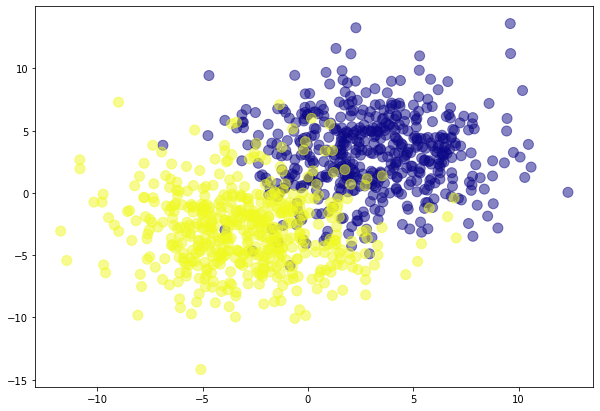

*********************************The first NN******************************************
Input shape (2,)
Feature shape: (2,)
(700, 2) (700,)
(300, 2) (300,)
(700, 2)
10/10 [==============================] - 0s 698us/step - loss: 0.1868 - accuracy: 0.9200


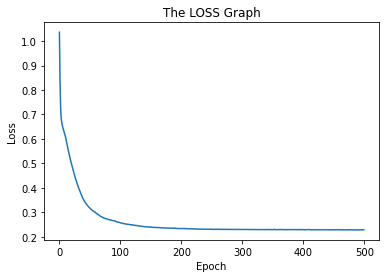

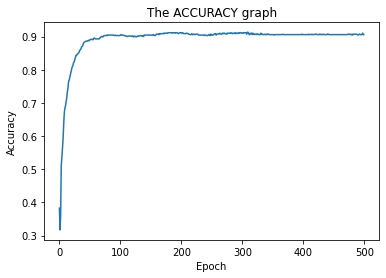

Test results - Loss: 0.18678171932697296 - Accuracy: 92.00000166893005%
(300, 2)
(300,)


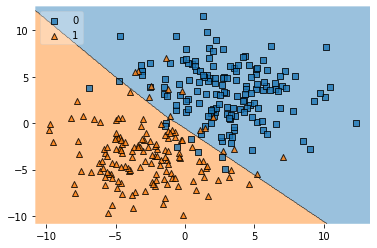


****************************The Weights Are******************************************
[[ 0.6323329  -1.4457583 ]
 [ 0.62927353 -0.6578398 ]]

**********************************The New NN*******************************************


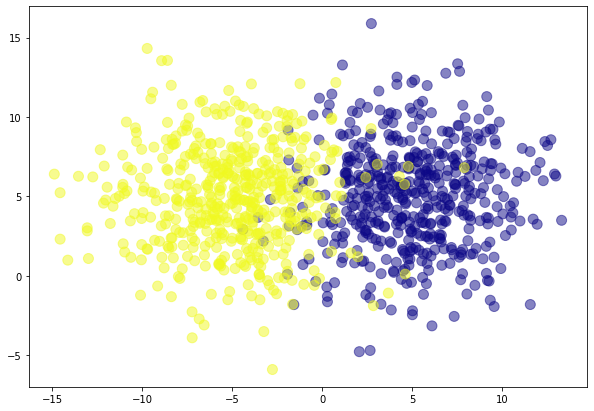

(700, 2) (700,)
(300, 2) (300,)
(700, 2)
10/10 [==============================] - 0s 772us/step - loss: 0.1638 - accuracy: 0.9433


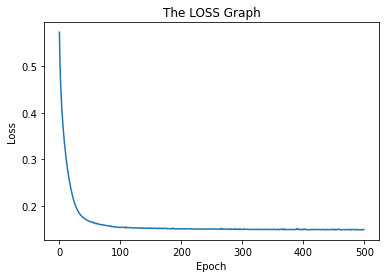

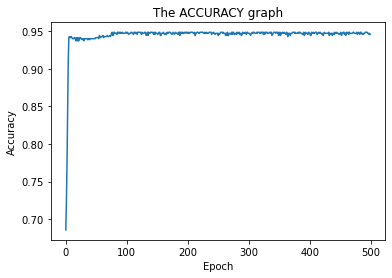

Test results - Loss: 0.16375087201595306 - Accuracy: 94.33333277702332%


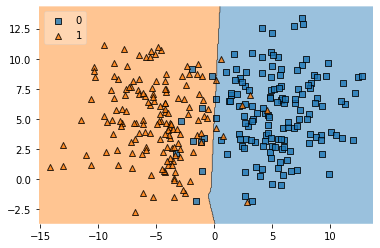

In [90]:
def main():
    #Class 1
    mean = [3,3]
    cov = [[10,0],
           [0,10]] 
    Class1 = np.random.multivariate_normal(mean,cov,500)

    #Class 2
    mean = [-3,-3]
    cov = [[10,0],
           [0,10]] 
    Class2 = np.random.multivariate_normal(mean,cov,500)    
    

    X = np.vstack([Class1, Class2])

    # Y = np.array([0]*500 + [1]*500 + [2]*500)
    Y = np.array([0]*500 + [1]*500)
    #print(Y)

    one_hot_labels = np.zeros((1000, 2))

    for i in range(1000):
        one_hot_labels[i, Y[i]] = 1

    plt.figure(figsize=(10,7))
    plt.scatter(X[:,0], X[:,1], c=Y, cmap='plasma', s=100, alpha=0.5)
    plt.show()
    print("*********************************The first NN******************************************")
    w = theOriginalNN(X,Y)
    print("\n****************************The Weights Are******************************************")
    print(w)
    print("\n**********************************The New NN*******************************************")
    NewCall(w)
    
if __name__ == "__main__":
    main()